![head.png](https://github.com/iwh-halle/FinancialDataAnalytics/blob/master/figures/head.jpg?raw=1)

# Financial Data Analytics in Python

**Prof. Dr. Fabian Woebbeking**</br>
Assistant Professor of Financial Economics

IWH - Leibniz Institute for Economic Research</br>
MLU - Martin Luther University Halle-Wittenberg

fabian.woebbeking@iwh-halle.de

# Homework Assignment

You will need a Git/GitHub repository to submit your course deliverables. Consult [**slides.ipynb**](https://github.com/iwh-halle/FinancialDataAnalytics) for help with the tasks below! If you need further assistance, do not hesitate to open a Q&A at https://github.com/iwh-halle/FinancialDataAnalytics/discussions



## Part 1: Python basics

### Task:

1. Write a function that calculates the present value as

    $\text{PV}(C_t) = \frac{C_t}{(1+r)^t}$

2. Provide a docstring for the function.
3. Print the output for $C_{10} = 100$ and $r = 0.03$. Use string formatting to improve readability.

In [1]:
def present_value(C, r, t):
    """
    Calculate the present value of a cash flow.

    Parameters:
    C (float): The future cash flow.
    r (float): The discount rate.
    t (int): The time period in years.

    Returns:
    float: The present value of the cash flow.
    """
    return C / (1 + r) ** t

# Test the function with C {10} = 100 and r = 0.03
C = 100
r = 0.03
t = 10

pv = present_value(C, r, t)
print(f"The present value of $100 received in 10 years at a 3% discount rate is: ${pv:.2f}")

The present value of $100 received in 10 years at a 3% discount rate is: $74.41


### Task:

Plot $\text{PV}(C_t) = \frac{C_t}{(1+r)^t}$, with $C_{10} = 100$, as a function of $r$ for the interval 0 to 25%.

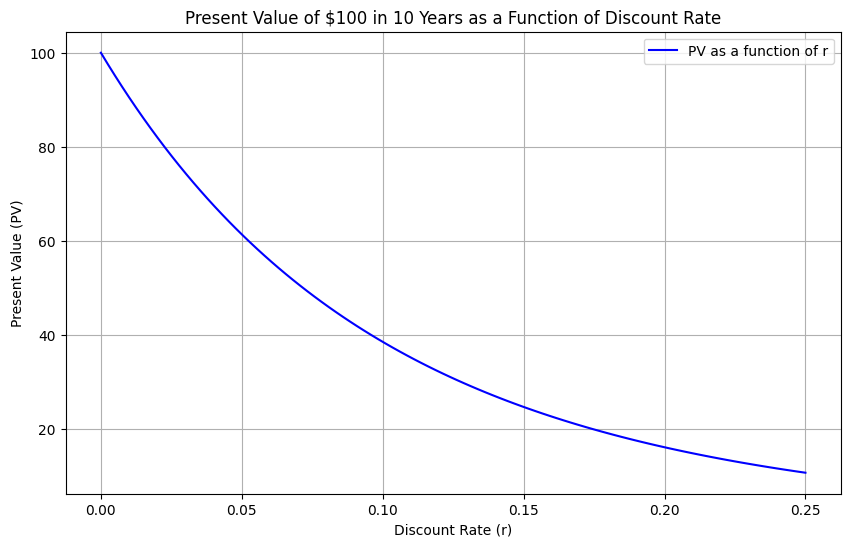

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the present value function
def present_value(C, r, t):
    """
    Calculate the present value of a cash flow.

    Parameters:
    C (float): The future cash flow.
    r (float): The discount rate.
    t (int): The time period in years.

    Returns:
    float: The present value of the cash flow.
    """
    return C / (1 + r) ** t

# Constants
C = 100  # Future cash flow
t = 10     # Time period in years

# Generate an array of discount rates from 0 to 0.25 (0% to 25%)
r_values = np.linspace(0, 0.25, 100)

# Calculate the present value for each discount rate
pv_values = [present_value(C, r, t) for r in r_values]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(r_values, pv_values, label='PV as a function of r', color='blue')
plt.xlabel('Discount Rate (r)')
plt.ylabel('Present Value (PV)')
plt.title('Present Value of $100 in 10 Years as a Function of Discount Rate')
plt.grid(True)
plt.legend()
plt.show()

### Task:

1. Use a loop to calculate the present value of $[10, 10, 110]$, these payments are made annually over the next three years. The interest rate is flat at $0.05$.
2. Print the discounted cash flow in a readable format.

In [4]:
def present_value(C, r, t):
    """
    Calculate the present value of a cash flow.

    Parameters:
    C (float): The future cash flow.
    r (float): The discount rate.
    t (int): The time period in years.

    Returns:
    float: The present value of the cash flow.
    """
    return C / (1 + r) ** t

# Given cash flows and interest rate
cash_flows = [10, 10, 110]  # Cash flows for each year
r = 0.05                    # Discount rate
total_pv = 0                # Initialize total present value

# Calculate the present value for each cash flow and sum them up
for t, C in enumerate(cash_flows, start=1):
    pv = present_value(C, r, t)
    total_pv += pv
    print(f"Year {t}: Cash Flow = ${C}, Present Value = ${pv:.2f}")

# Print the total present value of all cash flows
print(f"\nTotal Present Value of all cash flows: ${total_pv:.2f}")


Year 1: Cash Flow = $10, Present Value = $9.52
Year 2: Cash Flow = $10, Present Value = $9.07
Year 3: Cash Flow = $110, Present Value = $95.02

Total Present Value of all cash flows: $113.62


## Part 2: Working with data

In this assignment, you will work with financial data from a CSV file and use Python libraries such as NumPy, Pandas, Matplotlib and Seaborn to analyze and visualize the data. The data is stored in a file named 02_python_data.csv, which contains daily stock prices for various companies listed on Deutsche Börse (Xetra). The columns are labeled with Reuters identifier code (RIC). The first RIC '.GDAXI' is the german DAX index, the remaining RICs represent its constituents.

**Save all your visualizations as PNG files with "02_python_" as a prefix, e.g. "02_python_pricechart.png".**

In general, it is a useful practice to prefix output files with the name of the generating script.

### Task: 

1. Load the stock price data into a Pandas data frame called 'prices'.
2. Calculate both arithmetic as well as logarithmic returns for all assets. Store the return data in two separate data frames, named 'returns' and 'logreturns'. 
3. Display the first 5 rows of each data frame.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the stock price data
prices = pd.read_csv('02_python_data.csv', index_col=0, parse_dates=True)

# Step 2: Calculate arithmetic returns
returns = prices.pct_change().dropna()

# Step 2: Calculate logarithmic returns
logreturns = np.log(prices / prices.shift(1)).dropna()

# Step 3: Display the first 5 rows of each DataFrame
print("First 5 rows of prices:")
print(prices.head())

print("\nFirst 5 rows of returns:")
print(returns.head())

print("\nFirst 5 rows of logreturns:")
print(logreturns.head())


First 5 rows of prices:
              .GDAXI    SAPG.DE  SIEGn.DE  DTEGn.DE  AIRG.DE  ALVG.DE  \
Date                                                                    
2022-04-29  14097.88  97.026932    117.78    17.570   105.50   216.20   
2022-05-02  13939.07  95.982669    115.12    17.290   103.96   215.00   
2022-05-03  14039.47  94.729554    114.56    17.376   106.44   217.00   
2022-05-04  13970.82  92.979171    115.78    17.530   102.68   213.55   
2022-05-05  13902.52  94.699718    116.58    17.592   108.96   199.76   

            MBGn.DE  VOWG_p.DE  BMWG.DE  SHLG.DE  ...  CONG.DE  HEIG.DE  \
Date                                              ...                     
2022-04-29    67.10     148.94    78.51    51.26  ...    66.02    55.26   
2022-05-02    62.22     147.22    77.64    50.22  ...    62.46    54.74   
2022-05-03    62.88     150.20    79.98    50.42  ...    64.32    55.22   
2022-05-04    62.33     148.52    79.47    51.98  ...    63.30    55.42   
2022-05-05    

### Task:

1. Plot a histogram of DAX returns.
2. Plot both the prices as well as the returns of the DAX in one plot (you need two y axis).

Hint: 
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

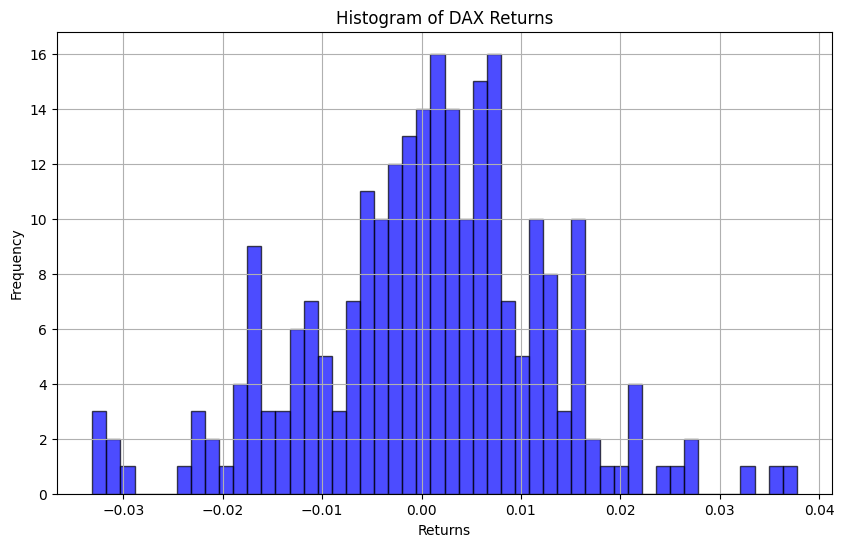

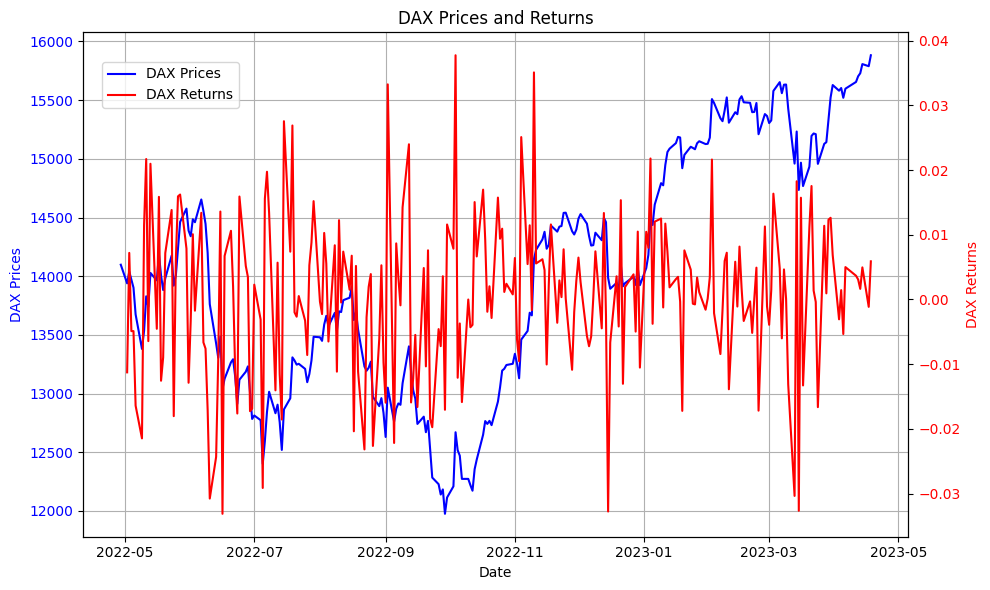

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the stock price data
prices = pd.read_csv('02_python_data.csv', index_col=0, parse_dates=True)

# Calculate arithmetic returns
returns = prices.pct_change().dropna()

# Extract DAX prices and returns
dax_prices = prices['.GDAXI']
dax_returns = returns['.GDAXI']

# Step 1: Plot a histogram of DAX returns
plt.figure(figsize=(10, 6))
plt.hist(dax_returns, bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of DAX Returns')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('02_python_dax_histogram.png')
plt.show()

# Step 2: Plot both the prices and the returns of the DAX in one plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot DAX prices
ax1.plot(dax_prices, color='blue', label='DAX Prices')
ax1.set_xlabel('Date')
ax1.set_ylabel('DAX Prices', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Create a secondary y-axis to plot returns
ax2 = ax1.twinx()
ax2.plot(dax_returns, color='red', label='DAX Returns')
ax2.set_ylabel('DAX Returns', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legends
plt.title('DAX Prices and Returns')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
plt.savefig('02_python_dax_prices_returns.png')
plt.show()


### Task:

Which company had the highest average stock return during the time period covered by the data?

In [8]:
import pandas as pd
import numpy as np

# Load the stock price data
prices = pd.read_csv('02_python_data.csv', index_col=0, parse_dates=True)

# Calculate arithmetic returns
returns = prices.pct_change().dropna()

# Compute the average return for each company
average_returns = returns.mean()

# Identify the company with the highest average return
highest_avg_return_company = average_returns.idxmax()
highest_avg_return_value = average_returns.max()

print(f"The company with the highest average stock return is {highest_avg_return_company} with an average return of {highest_avg_return_value:.4f}")


The company with the highest average stock return is CBKG.DE with an average return of 0.0024


### Task:

Plot a [heat map](https://en.wikipedia.org/wiki/Heat_map) of the [correlations](https://en.wikipedia.org/wiki/Correlation) between the arithmetic returns of the first 10 assets (i.e. first 10 columns).

Hint:
* `returns.iloc[:10,:10]` see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html
* `returns.iloc[:10,:10].corr()` see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
* `sns.heatmap()` see https://seaborn.pydata.org/generated/seaborn.heatmap.html

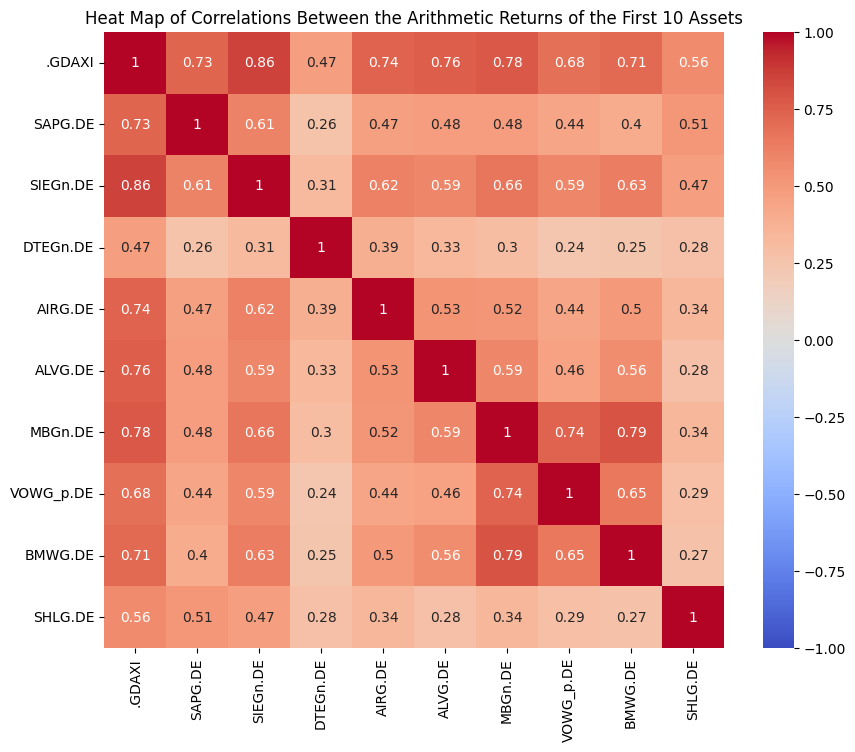

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the stock price data
prices = pd.read_csv('02_python_data.csv', index_col=0, parse_dates=True)

# Calculate arithmetic returns
returns = prices.pct_change().dropna()

# Select the first 10 assets' returns
first_10_returns = returns.iloc[:, :10]

# Calculate the correlation matrix
correlation_matrix = first_10_returns.corr()

# Plot the heat map of the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Heat Map of Correlations Between the Arithmetic Returns of the First 10 Assets')
plt.savefig('02_python_correlation_heatmap.png')
plt.show()


### Task:

Considering all assets in the data, pick two pairs of stocks: 
1. the pair with the highest correlation and 
2. the pair with the lowest correlation. 
3. Create [scatter plots](https://en.wikipedia.org/wiki/Scatter_plot) for both pairs.

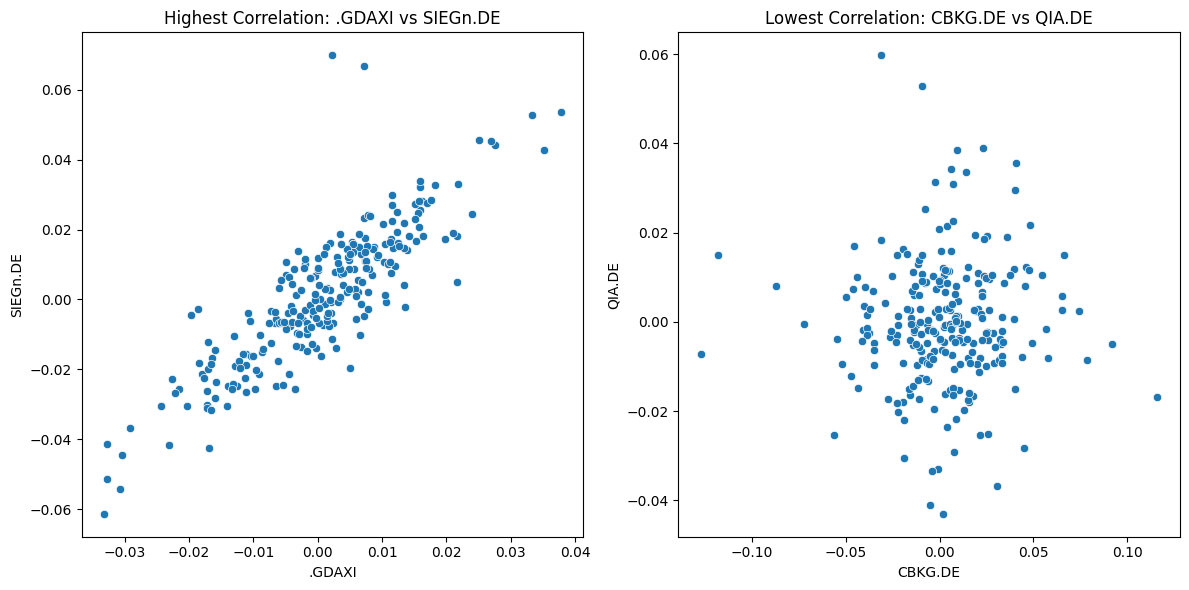

In [4]:
# Load the stock price data
prices = pd.read_csv('02_python_data.csv', index_col=0, parse_dates=True)

# Calculate arithmetic returns
returns = prices.pct_change().dropna()

# Calculate the correlation matrix
correlation_matrix = returns.corr()

# Find the pair of stocks with the highest correlation
highest_corr_pair = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates().index[1]

# Find the pair of stocks with the lowest correlation
lowest_corr_pair = correlation_matrix.unstack().sort_values().drop_duplicates().index[0]

# Scatter plot for the pair with the highest correlation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=returns[highest_corr_pair[0]], y=returns[highest_corr_pair[1]])
plt.xlabel(highest_corr_pair[0])
plt.ylabel(highest_corr_pair[1])
plt.title(f'Highest Correlation: {highest_corr_pair[0]} vs {highest_corr_pair[1]}')

# Scatter plot for the pair with the lowest correlation
plt.subplot(1, 2, 2)
sns.scatterplot(x=returns[lowest_corr_pair[0]], y=returns[lowest_corr_pair[1]])
plt.xlabel(lowest_corr_pair[0])
plt.ylabel(lowest_corr_pair[1])
plt.title(f'Lowest Correlation: {lowest_corr_pair[0]} vs {lowest_corr_pair[1]}')

plt.tight_layout()
plt.savefig('02_python_scatter_plots.png')
plt.show()


### Task:

1. Calculate the annualized [volatility](https://en.wikipedia.org/wiki/Volatility_(finance)) and [return](https://en.wikipedia.org/wiki/Rate_of_return) of each asset in the dataset. Assume there are 252 trading days in a year. (Use log-returns!)
2. Also calculate the [Sharpe ratio](https://en.wikipedia.org/wiki/Sharpe_ratio) for each asset, assuming a risk free rate of $0.5\%$ p.a..

           Annualized Return  Annualized Volatility  Sharpe Ratio
.GDAXI              0.120640               0.192007      0.602271
SAPG.DE             0.187016               0.243553      0.747334
SIEGn.DE            0.225660               0.313924      0.702910
DTEGn.DE            0.248276               0.169142      1.438295
AIRG.DE             0.197860               0.299162      0.644667
ALVG.DE             0.013023               0.225913      0.035513
MBGn.DE             0.045276               0.332984      0.120954
VOWG_p.DE          -0.164629               0.346088     -0.490132
BMWG.DE             0.285525               0.267520      1.048615
SHLG.DE             0.046686               0.310205      0.134381
BAYGn.DE           -0.024427               0.295439     -0.099605
DPWGn.DE            0.063970               0.304620      0.193586
IFXGn.DE            0.294047               0.407888      0.708644
MUVGn.DE            0.374857               0.228483      1.618751
BASFn.DE  

/tmp/ipykernel_6434/1565555085.py:58: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (annualized_volatility[i], annualized_return[i]), fontsize=8, alpha=0.7)


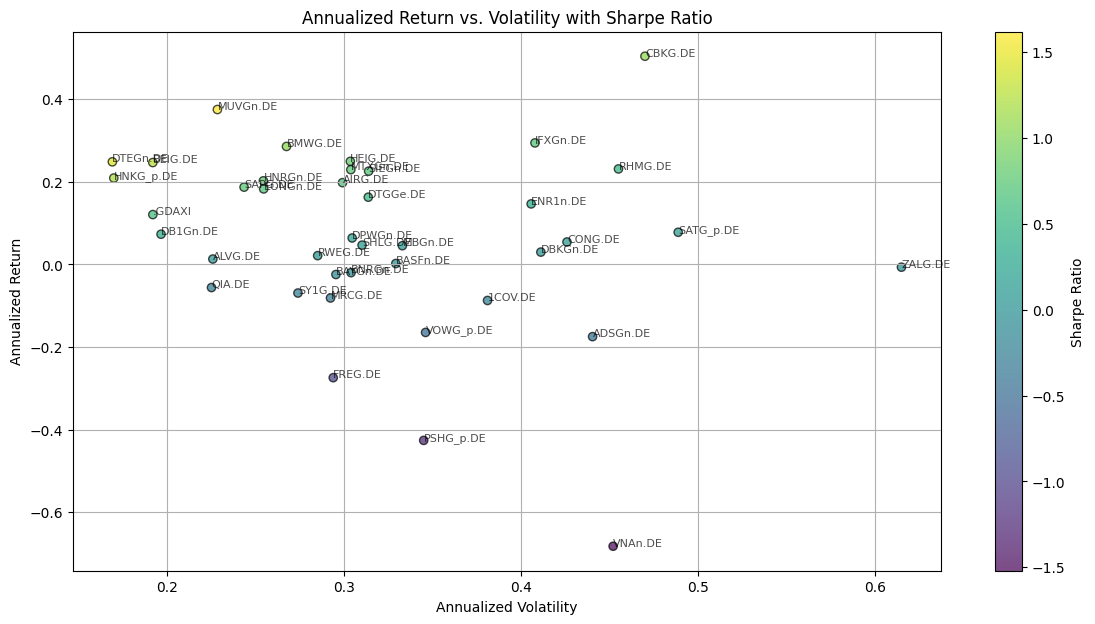

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the stock price data
prices = pd.read_csv('02_python_data.csv', index_col=0, parse_dates=True)

# Calculate arithmetic returns
returns = prices.pct_change().dropna()

# Calculate log-returns
logreturns = np.log(prices / prices.shift(1)).dropna()

# Task 6: Annualized Volatility, Return, and Sharpe Ratio

# Number of trading days in a year
trading_days = 252
risk_free_rate = 0.005

# Calculate annualized volatility
annualized_volatility = logreturns.std() * np.sqrt(trading_days)

# Calculate annualized return
annualized_return = logreturns.mean() * trading_days

# Calculate Sharpe ratio
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility

# Display results
results = pd.DataFrame({
    'Annualized Return': annualized_return,
    'Annualized Volatility': annualized_volatility,
    'Sharpe Ratio': sharpe_ratio
})

print(results)

# Identify the stock with the highest Sharpe ratio
highest_sharpe_stock = sharpe_ratio.idxmax()
highest_sharpe_value = sharpe_ratio.max()

# Identify the stock with the lowest Sharpe ratio
lowest_sharpe_stock = sharpe_ratio.idxmin()
lowest_sharpe_value = sharpe_ratio.min()

print(f"\nThe stock with the highest Sharpe ratio is {highest_sharpe_stock} with a Sharpe ratio of {highest_sharpe_value:.4f}")
print(f"The stock with the lowest Sharpe ratio is {lowest_sharpe_stock} with a Sharpe ratio of {lowest_sharpe_value:.4f}")

# Plotting the annualized returns and volatilities
plt.figure(figsize=(14, 7))
plt.scatter(annualized_volatility, annualized_return, c=sharpe_ratio, cmap='viridis', edgecolors='k', alpha=0.7)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')
plt.title('Annualized Return vs. Volatility with Sharpe Ratio')
for i, txt in enumerate(annualized_return.index):
    plt.annotate(txt, (annualized_volatility[i], annualized_return[i]), fontsize=8, alpha=0.7)
plt.grid(True)
plt.savefig('02_python_annualized_return_volatility_sharpe.png')
plt.show()


### Task:

As you can see, we are using daily data so far. Re-sample the data to monthly frequency and plot monthly prices for 'BMWG.DE'.

Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html

/tmp/ipykernel_6434/1146865868.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_prices = prices['BMWG.DE'].resample('M').mean()


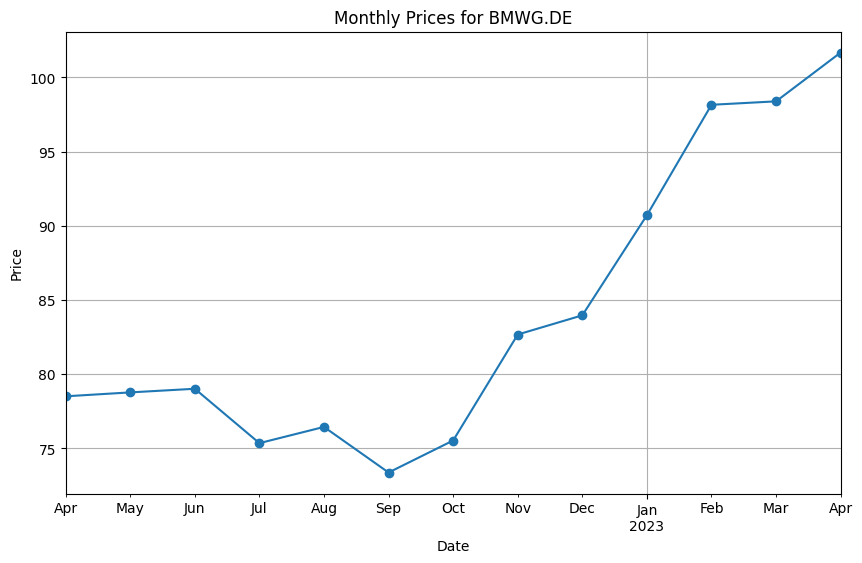

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the stock price data
prices = pd.read_csv('02_python_data.csv', index_col=0, parse_dates=True)

# Resample the data to monthly frequency
monthly_prices = prices['BMWG.DE'].resample('M').mean()

# Plot monthly prices for 'BMWG.DE'
plt.figure(figsize=(10, 6))
monthly_prices.plot(marker='o', linestyle='-')
plt.title('Monthly Prices for BMWG.DE')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.savefig('02_python_monthly_prices_BMWG_DE.png')
plt.show()
